In [ ]:
'''from google.colab import files
upload=files.upload()'''

'from google.colab import files\nupload=files.upload()'

In [ ]:

#upload2=files.upload()

In [ ]:
'''print(type(upload))
print(type(upload2))'''

'print(type(upload))\nprint(type(upload2))'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk 
import re
import matplotlib.pyplot as plt
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
real_news=pd.read_excel("/content/Real_News.xlsx")
fake_news=pd.read_excel("/content/Fake_News.xlsx")

'Real.to_csv(\'RealNews.csv\')\nFake.to_csv("FakeNews.csv")'

In [ ]:
print(real_news.isnull().sum())
print(fake_news.isnull().sum())
print(real_news.shape)
print(fake_news.shape)

Title        0
News_text    0
Subject      0
dtype: int64
Title        0
News_text    0
Subject      0
dtype: int64
(21755, 3)
(23697, 3)


In [ ]:
real_news["type"]=1
fake_news["type"]=0

In [ ]:
 
news=pd.concat([real_news,fake_news], axis=0,join="inner",ignore_index=True)
news

,Title,News_text,Subject,type
0,Trump judicial nominee withdraws from consider...,WASHINGTON (Reuters) - A lawyer nominated by P...,politicsNews,1
1,No. 2 Democrat in Senate calls on Franken to r...,"(Reuters) - U.S. Senator Dick Durbin, the No. ...",politicsNews,1
2,"WTO chief won't debate Trump, but rallies supp...",GENEVA (Reuters) - The head of the World Trade...,politicsNews,1
3,Hungary says it is facing 'frontal assault' fr...,BUDAPEST (Reuters) - Hungary is facing a front...,worldnews,1
4,Senate Republicans shove tax bill ahead as Dem...,WASHINGTON (Reuters) - U.S. Senate Republicans...,politicsNews,1
...,...,...,...,...
45447,CLOAKED ORDER: Whoâ€™s Really Behind â€˜New Au...,"21st Century Wire says Earlier this week, the ...",Middle-east,0
45448,Bill Maher Gets His Swagger On Over Liberal C...,Bill Maher finished Friday s episode of Real T...,News,0
45449,WHOA! BLACK WOMAN FED UP WITH BLACK RACISTS NA...,WOW This woman absolutely nails it!,politics,0
45450,"State Dept. Releases 7,000 Clinton E-mails But...","The State Department released 7,000 Clinton e-...",politics,0


In [ ]:
print(news.columns)


Index(['Title', 'News_text', 'Subject', 'type'], dtype='object')


In [ ]:
#Feature engineering -
news["main"]=news["Title"].str.cat(news["News_text"], sep=" ") #joining the columns as a single one
print(news.shape)
news

(45452, 5)


,Title,News_text,Subject,type,main
0,Trump judicial nominee withdraws from consider...,WASHINGTON (Reuters) - A lawyer nominated by P...,politicsNews,1,Trump judicial nominee withdraws from consider...
1,No. 2 Democrat in Senate calls on Franken to r...,"(Reuters) - U.S. Senator Dick Durbin, the No. ...",politicsNews,1,No. 2 Democrat in Senate calls on Franken to r...
2,"WTO chief won't debate Trump, but rallies supp...",GENEVA (Reuters) - The head of the World Trade...,politicsNews,1,"WTO chief won't debate Trump, but rallies supp..."
3,Hungary says it is facing 'frontal assault' fr...,BUDAPEST (Reuters) - Hungary is facing a front...,worldnews,1,Hungary says it is facing 'frontal assault' fr...
4,Senate Republicans shove tax bill ahead as Dem...,WASHINGTON (Reuters) - U.S. Senate Republicans...,politicsNews,1,Senate Republicans shove tax bill ahead as Dem...
...,...,...,...,...,...
45447,CLOAKED ORDER: Whoâ€™s Really Behind â€˜New Au...,"21st Century Wire says Earlier this week, the ...",Middle-east,0,CLOAKED ORDER: Whoâ€™s Really Behind â€˜New Au...
45448,Bill Maher Gets His Swagger On Over Liberal C...,Bill Maher finished Friday s episode of Real T...,News,0,Bill Maher Gets His Swagger On Over Liberal C...
45449,WHOA! BLACK WOMAN FED UP WITH BLACK RACISTS NA...,WOW This woman absolutely nails it!,politics,0,WHOA! BLACK WOMAN FED UP WITH BLACK RACISTS NA...
45450,"State Dept. Releases 7,000 Clinton E-mails But...","The State Department released 7,000 Clinton e-...",politics,0,"State Dept. Releases 7,000 Clinton E-mails But..."


# Feature Selection & Engineering



In [ ]:
#As we have done joined the 2 columns that is title and News Text to the main we will perform the all the preprocessing part into the main one 
data=news[["main","type"]]
#news.isnull().any()
print(data.shape)
data

(45452, 2)


,main,type
0,Trump judicial nominee withdraws from consider...,1
1,No. 2 Democrat in Senate calls on Franken to r...,1
2,"WTO chief won't debate Trump, but rallies supp...",1
3,Hungary says it is facing 'frontal assault' fr...,1
4,Senate Republicans shove tax bill ahead as Dem...,1
...,...,...
45447,CLOAKED ORDER: Whoâ€™s Really Behind â€˜New Au...,0
45448,Bill Maher Gets His Swagger On Over Liberal C...,0
45449,WHOA! BLACK WOMAN FED UP WITH BLACK RACISTS NA...,0
45450,"State Dept. Releases 7,000 Clinton E-mails But...",0


In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
 
data["main"]=data["main"].apply(lambda x : re.sub(r"[^a-zA-Z.]"," ",x))
data["main"]=data["main"].apply(lambda x: x.lower())
data["main"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        trump judicial nominee withdraws from consider...
1        no.   democrat in senate calls on franken to r...
2        wto chief won t debate trump  but rallies supp...
3        hungary says it is facing  frontal assault  fr...
4        senate republicans shove tax bill ahead as dem...
                               ...                        
45447    cloaked order  who   s really behind    new au...
45448     bill maher gets his swagger on over liberal c...
45449    whoa  black woman fed up with black racists na...
45450    state dept. releases       clinton e mails but...
45451    muslim afghani rapes   year old  gets   years ...
Name: main, Length: 45452, dtype: object

In [ ]:
from textblob import TextBlob
from textblob import Word
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer=PorterStemmer()
print(stopwords.words('english'))

In [ ]:
'''def jugaad(x):
  line= x.split()
  luck=[stemmer.stem(i) for i in line if i not in stopwords.words("english")]
  final=" ".join(luck)
  return final 
 
 
data["main"]=data["main"].apply(lambda x: jugaad(x))
data["main"]'''

'def jugaad(x):\n  line= x.split()\n  luck=[stemmer.stem(i) for i in line if i not in stopwords.words("english")]\n  final=" ".join(luck)\n  return final \n \n \ndata["main"]=data["main"].apply(lambda x: jugaad(x))\ndata["main"]'

In [ ]:

"""data.to_excel("PreProcessedData.xlsx")"""

In [ ]:
data=pd.read_excel("PreProcessedData.xlsx")


In [ ]:
data.shape
Class=data["type"]

In [ ]:
#Here we are making the corpus for TFIDF vectorizer
corpus=[]
for i in data["main"]:
  corpus.append(i)
len(corpus)


45452

In [ ]:
#here we will make the 2 list of words one will be for Fake news & another one will be for Real news
words_real=[]
for j in range(len(data.iloc[0:21755,0:1])):
  a=data["main"][j].split()
  for k in a:
    words_real.append(k)
len(words_real)

5259472

In [ ]:
words_fake=[]
for l in range(len(data.iloc[21755:,0:1])):
  b=data["main"][l].split()
  for m in b:
    words_fake.append(m)
len(words_fake)


5734869

In [ ]:
from collections import Counter
Freq_fake=Counter(words_real).most_common(100)
Freq_fake

[('said', 78530),
 ('trump', 60539),
 ('u.s.', 45267),
 ('state', 35850),
 ('would', 32456),
 ('presid', 30165),
 ('reuter', 27321),
 ('republican', 24091),
 ('said.', 21971),
 ('.', 21341),
 ('govern', 19922),
 ('year', 19502),
 ('say', 18777),
 ('hous', 18396),
 ('new', 18377),
 ('democrat', 16975),
 ('unit', 16776),
 ('senat', 16577),
 ('also', 16354),
 ('elect', 15776),
 ('parti', 15044),
 ('peopl', 14931),
 ('offici', 14863),
 ('told', 14551),
 ('nation', 14385),
 ('could', 14251),
 ('one', 14158),
 ('last', 13330),
 ('two', 13143),
 ('call', 13092),
 ('washington', 12728),
 ('countri', 12572),
 ('includ', 12390),
 ('support', 12207),
 ('report', 11768),
 ('vote', 11738),
 ('secur', 11523),
 ('campaign', 11501),
 ('former', 11102),
 ('donald', 10927),
 ('north', 10827),
 ('leader', 10812),
 ('court', 10622),
 ('clinton', 10617),
 ('white', 10597),
 ('group', 10596),
 ('tax', 10141),
 ('obama', 10114),
 ('polit', 9942),
 ('plan', 9895),
 ('minist', 9833),
 ('time', 9661),
 ('right'

In [ ]:
#here we are checking out the words which came more often in complete Corpus by using the function Counter
Freq_real=Counter(words_fake).most_common(100)
Freq_real

[('said', 80787),
 ('trump', 67087),
 ('u.s.', 46008),
 ('state', 37805),
 ('would', 34377),
 ('presid', 32536),
 ('reuter', 27364),
 ('republican', 25431),
 ('.', 22643),
 ('said.', 22330),
 ('year', 20846),
 ('govern', 20727),
 ('say', 20495),
 ('new', 19720),
 ('hous', 19418),
 ('democrat', 18030),
 ('also', 17559),
 ('unit', 17514),
 ('senat', 17256),
 ('peopl', 16995),
 ('elect', 16707),
 ('one', 16228),
 ('parti', 15719),
 ('nation', 15424),
 ('offici', 15382),
 ('told', 15280),
 ('could', 15058),
 ('call', 14364),
 ('last', 14026),
 ('two', 13852),
 ('countri', 13365),
 ('support', 13307),
 ('washington', 13205),
 ('report', 12976),
 ('includ', 12970),
 ('vote', 12524),
 ('donald', 12411),
 ('clinton', 12376),
 ('campaign', 12296),
 ('secur', 12004),
 ('white', 11856),
 ('obama', 11829),
 ('former', 11693),
 ('group', 11217),
 ('court', 11176),
 ('leader', 11170),
 ('time', 11076),
 ('north', 11066),
 ('polit', 10803),
 ('right', 10538),
 ('tax', 10500),
 ('like', 10410),
 ('mak

In [ ]:
!pip install wordcloud

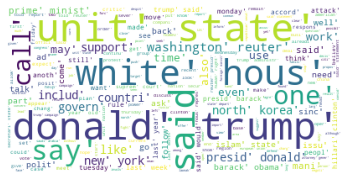

In [ ]:

from wordcloud import WordCloud , STOPWORDS
#For Fake News
Chart=WordCloud(background_color="white",stopwords=set(STOPWORDS)).generate(str(words_fake))
Chart
plt.axis("off")
plt.imshow(Chart)

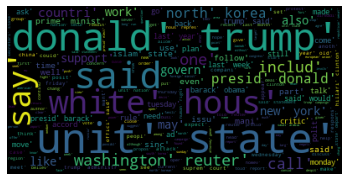

In [ ]:
from wordcloud import WordCloud , STOPWORDS
#For Real News
Chart2=WordCloud(stopwords=set(STOPWORDS)).generate(str(words_real))
plt.axis("off")
plt.imshow(Chart2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
ready=tfidf_v.fit(corpus)
ready


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
import pickle
with open("tfidf.pkl","wb") as file:
  pickle.dump(ready,file)


In [ ]:
feature=ready.get_feature_names()
datavalues=ready.transform(data["main"]).toarray()
datavalues.shape



(45452, 5000)

In [ ]:
NewsVector=pd.DataFrame(datavalues,columns=feature)
NewsVector
NewsVector["class"]=Class

In [ ]:
#Now Introducing the class that is whether the news is Fake or real
#Divide the dataset into Train and Test
X=datavalues
y=NewsVector["class"].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30452, 5000), (15000, 5000), (30452,), (15000,))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
Naivebayes=MultinomialNB()
model=Naivebayes.fit(X_train,y_train)
pred=model.predict(X_test)

#Measuring the accuracy of the model
print(metrics.classification_report(y_test,pred))
print(metrics.confusion_matrix(y_test,pred))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7837
           1       0.95      0.94      0.95      7163

    accuracy                           0.95     15000
   macro avg       0.95      0.95      0.95     15000
weighted avg       0.95      0.95      0.95     15000

[[7474  363]
 [ 398 6765]]


In [ ]:
import pickle
with open('NBmodel.pkl', 'wb') as Model:
  pickle.dump(model,Model)


In [ ]:
from sklearn.metrics import plot_confusion_matrix

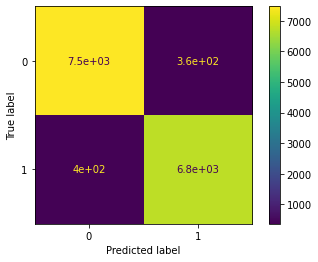

In [ ]:
plot_confusion_matrix(model,X_test,y_test)

In [ ]:
pip install pyspellchecker

     |████████████████████████████████| 2.7MB 5.9MB/s 


In [ ]:
from spellchecker import SpellChecker
from textblob import TextBlob
 
p=[]
spell = SpellChecker()
H="hello0 sparkd hows youhh"
H=H.split()
# find those words that may be misspelled
for i in H:
  misspelled = spell.correction(i)
  print(misspelled)

  p.append(misspelled)
p
#text=TextBlob(H)
 
 
#text.correct()
 
    # Get a list of `likely` option

hello
spared
hows
youth


['hello', 'spared', 'hows', 'youth']

In [ ]:
F='sotinng hapenning here'
G=TextBlob(F).correct()
G

TextBlob("noting happening here")